In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import ast
from mgua import *
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE


import random as rnd
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.feature_extraction.text import TfidfTransformer

In [113]:
tab1 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NNdbr_UpTo2chains.csv")
tab2 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NNdbr_UpTo3chains.csv")
tab3 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NNdbr_UpTo4chains.csv")
tab4 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NNdbr_UpTo5chains.csv")

tab1.shape, tab2.shape, tab3.shape, tab4.shape

((467, 107), (467, 274), (467, 577), (467, 1066))

In [114]:
tab1["key"] = [i for i in range(tab1.shape[0])]
tab2["key"] = [i for i in range(tab2.shape[0])]
tab3["key"] = [i for i in range(tab3.shape[0])]
tab4["key"] = [i for i in range(tab4.shape[0])]

In [115]:
tab = pd.merge(tab1, tab2, left_on="key", right_on="key", how="inner")
tab = pd.merge(tab, tab3, left_on="key", right_on="key", how="inner")
tab = pd.merge(tab, tab4, left_on="key", right_on="key", how="inner")

In [116]:
for i in tab.keys():
    print(i+"; ",end="")

Br1scC3as; C1dcC2dc; C1scC2sc; C1scC3as; C1scC3dc; C1scC4sc; C1scC4ss; C1scN2sc; C1scN3as; C1scN3sc; C1scO2sc; C1scS2sc; C1scS3dc; C1scS4wc; C2arC2ar; C2arC3as; C2arN2ar; C2arN3as; C2arO2ar; C2arS2ar; C2dcC2sc; C2dcC3as; C2dcO1dc; C2drC2sr; C2drC3ds; C2drC4ss; C2scC2sc; C2scC2tc; C2scC3as; C2scC3dc; C2scC4sc; C2scC4ss; C2scF1sc; C2scN1sc; C2scN2sc; C2scN3as; C2scN3sc; C2scO1sc; C2scO2sc; C2scS2sc; C2scS4wc; C2srC2sr; C2srC3as; C2srC3ds; C2srC3ss; C2srC4ss; C2srO2sr; C2srS2sr; C2tcC3as; C2tcN1tc; C3asC3as; C3asC3dc; C3asC3ds; C3asC3sc; C3asC3ss; C3asC4sc; C3asCl1sc; C3asF1sc; C3asN1sc; C3asN2ar; C3asN2sc; C3asN3as; C3asN3dc; C3asN3sc; C3asO1sc; C3asO2ar; C3asO2sc; C3asO2sr; C3asS2ar; C3asS2sc; C3asS2sr; C3asS3dc; C3asS4wc; C3dcC4sc; C3dcN1sc; C3dcN2sc; C3dcO1dc; C3dcO1sc; C3dcO2sc; C3dsC3ds; C3dsN2dr; C3dsS2sr; C3scC4sc; C3scF1sc; C3scO1sc; C3scO2sc; C3ssC3ss; C3ssF1sc; C3ssN2dr; C3ssN3as; C3ssS2sr; C4scC4ss; C4scF1sc; C4scO2sc; C4scS4wc; N1scO2sc; N1scS4wc; N2arN2ar; N2arN3as; N2arO2ar

In [117]:
tab = tab.drop("key",axis=1)
tab.shape

(467, 2024)

In [118]:
tab.head()

,Br1scC3as,C1dcC2dc,C1scC2sc,C1scC3as,C1scC3dc,C1scC4sc,C1scC4ss,C1scN2sc,C1scN3as,C1scN3sc,...,N3asN2arC2arC3asS4wc,N3asN2arC3asC2scO1sc,N3asN2arC3asC2scO2sc,N3asN2arC3asC3asO1sc,N3asN2arC3asC3asO2sc,N3asN2arC3asC3asS2ar,N3asN2arC3asC3dcO1dc,N3asN2arC3asC3dcO1sc,N3asN2arC3asC3dcO2sc,S2arC3asC3ssC3ssS2sr
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
y = pd.read_csv("data_varvara/cox2/cox2_y.csv")

In [120]:
y = np.array(y)

In [121]:
r = []
for i in y:
    s = i[0]
    s = re.sub('inf', '1_000_000_000', str(s))
    r.append(ast.literal_eval(s))

In [122]:
y = np.array(r)
for i in range(y.shape[0]):
    if y[i,1] == 1_000_000_000:
        y[i,1] = np.inf

In [132]:
X = np.array(tab)

In [134]:
X = TfidfTransformer().fit_transform(X)

In [135]:
X = X.todense()

In [136]:
my_pca = PCA(20)

In [137]:
X_pca = my_pca.fit_transform(X)

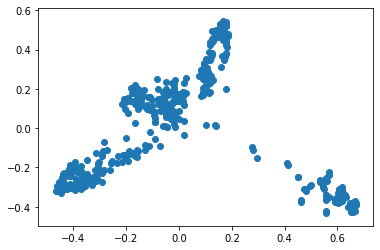

In [138]:
plt.scatter(X_pca[:,0], X_pca[:,1])


In [141]:
my_tsne = TSNE()
X_tsne = my_tsne.fit_transform(X)

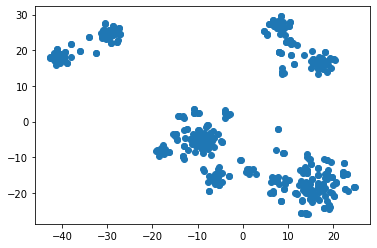

In [142]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

In [186]:
aggl = AgglomerativeClustering(n_clusters=5, affinity="manhattan", linkage="average")
aggl = DBSCAN(0.3,5,"cosine")

In [187]:
res = aggl.fit_predict(X)

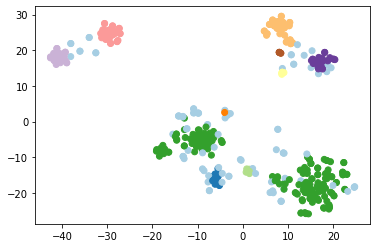

In [188]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=res, cmap=plt.cm.Paired)

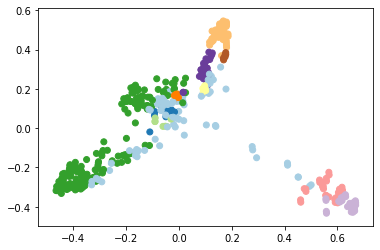

In [189]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=res, cmap=plt.cm.Paired)

In [190]:
silhouette_score(X,res)

0.18750759101306178

In [191]:
cluster_structure = res

In [192]:
mdl = RandomForestRegressor(n_jobs=-1, max_depth=20, min_samples_leaf=2, criterion="mse", max_features="log2")
# mdl = GradientBoostingRegressor(n_estimators=30, loss='ls', max_depth=10, min_samples_leaf=4)
# mdl = Ridge(2)

In [201]:
y_new = []
ans_all = []
ind = 1
for i in np.unique(cluster_structure):
    if i == -1:
        continue
    X_in_clust = X[np.where(res==i)[0],:]
    y_in_clust = y[np.where(res==i)[0],0]
#     print(X_in_clust.shape)
    ans = []
    
    for train_index, test_index in KFold(min(10, X_in_clust.shape[0])).split(X_in_clust):
        
        
        X_train = X_in_clust[train_index, :]
        y_train = y_in_clust[train_index]

        X_test = X_in_clust[test_index, :]
        y_test = y_in_clust[test_index]

        mdl.fit(X_train, y_train)
        for j in mdl.predict(X_test):
            ans.append(j)
        for j in mdl.predict(X_test):
            ans_all.append(0)
        for j in y_test:
            y_new.append(j)
    print("\\bigskip")
    print()
    print("Значения ошибок на " + str(ind) + " кластере размера " + str(X_in_clust.shape[0]))
    print()
    ans = [0 for i in range(len(ans))]
    print("MSE", MSE(ans,y_in_clust[:]))
    print()
    print("MAE", MAE(ans,y_in_clust[:]))
        
    ind+=1

    print()
    print()
    print()

\bigskip

Значения ошибок на 1 кластере размера 16

MSE 627.3242250000001

MAE 7.0925



\bigskip

Значения ошибок на 2 кластере размера 7

MSE 5729.185756571429

MAE 58.67485714285714



\bigskip

Значения ошибок на 3 кластере размера 192

MSE 1095.5354274981771

MAE 13.441813020833331



\bigskip

Значения ошибок на 4 кластере размера 37

MSE 706.4096484054054

MAE 7.990675675675677



\bigskip

Значения ошибок на 5 кластере размера 47

MSE 699.2748267446808

MAE 7.797510638297872



\bigskip

Значения ошибок на 6 кластере размера 5

MSE 624.4437924

MAE 16.308



\bigskip

Значения ошибок на 7 кластере размера 31

MSE 322.58197960935485

MAE 3.241493548387097



\bigskip

Значения ошибок на 8 кластере размера 31

MSE 351.92555458064516

MAE 4.414903225806452



\bigskip

Значения ошибок на 9 кластере размера 6

MSE 0.07493983333333333

MAE 0.20049999999999998



\bigskip

Значения ошибок на 10 кластере размера 6

MSE 0.003253833333333334

MAE 0.04083333333333333





In [202]:
print("MSE", MSE(ans_all,y_new[:]))
print()
print("MAE", MAE(ans_all,y_new[:]))


MSE 908.7825013426984

MAE 10.813508994708995


In [199]:
def plot_answer(ans, true):
    
    x = [i for i in range(len(ans))]
    
    fig = plt.figure(figsize=(17,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.legend()
    
    ax.scatter(x, ans, alpha=0.8, c="blue", label="Answer")
    ax.scatter(x, true, alpha=0.8, c="red", label="True")
    ax.legend(loc='upper left', fontsize=20)
    
    
    plt.show()

No handles with labels found to put in legend.


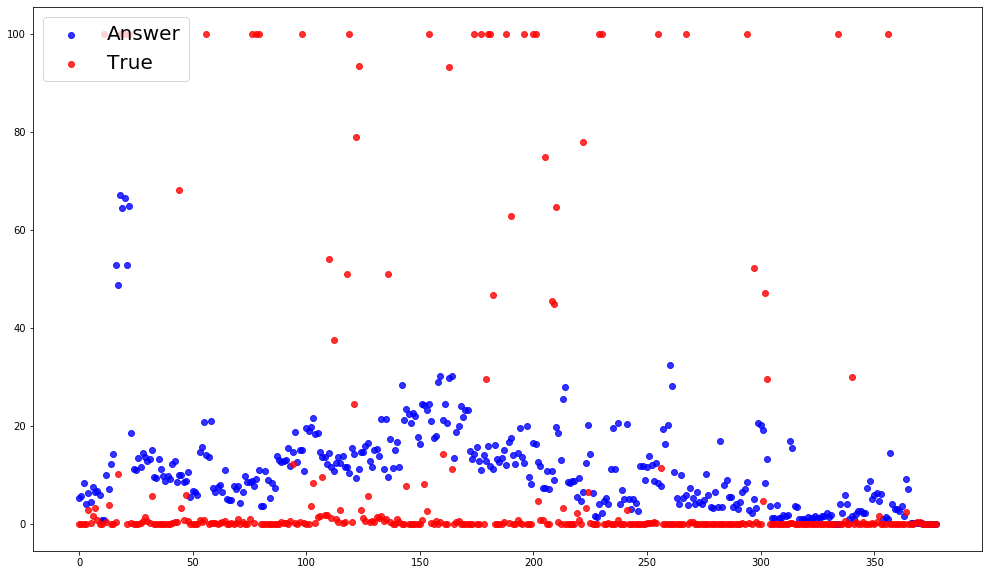

In [200]:
plot_answer(ans_all, y_new)

$a * u^{n+1}_{m-1} + b * u^{n+1}_{m} + c * u^{n+1}_{m+1} = d$

$u^1_m = f(\tau*0,h*1)$, где h - длина шага сетки по X, \tau длина шага по T
